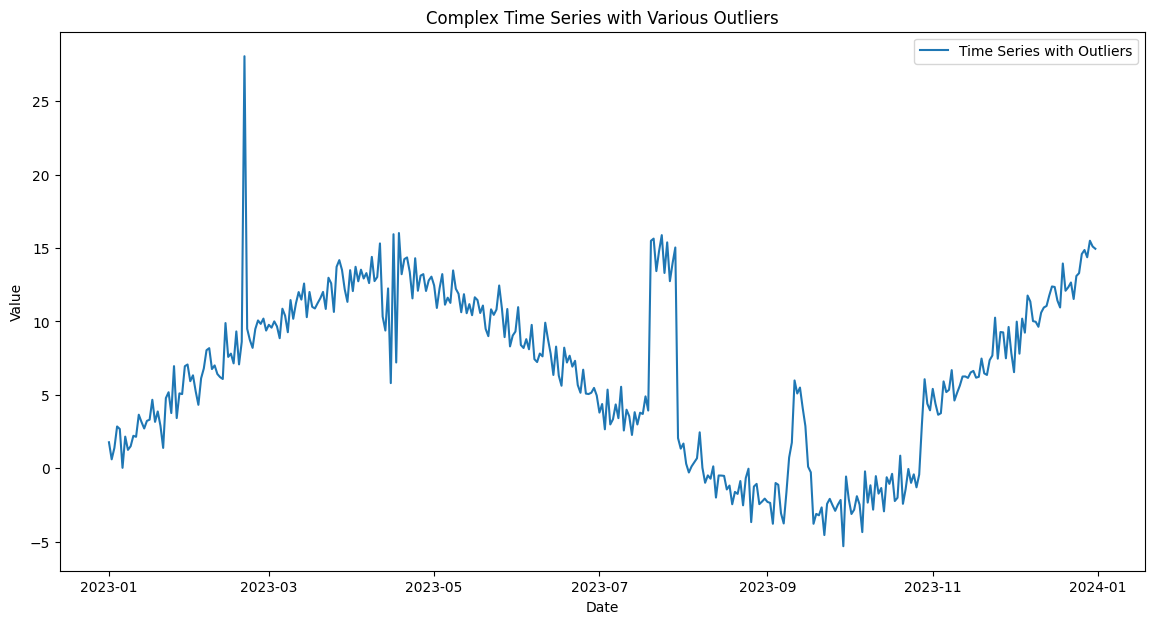

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 创建时间序列
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
trend = np.linspace(0, 10, 365)  # 线性趋势
seasonal = 10 * np.sin(np.linspace(0, 3.14 * 2, 365))  # 周期性成分
noise = np.random.normal(0, 1, 365)  # 随机噪声
data = trend + seasonal + noise

# 插入全局异常
data[50] += 20  # 全局异常

# 插入上下文异常
data[100:110] += np.random.normal(0, 5, 10)  # 上下文异常

# 插入形状异常
data[200:210] = 15 + np.random.normal(0, 1, 10)  # 形状异常

# 插入季节性异常
data[250:260] = 5 * np.sin(np.linspace(0, 3.14, 10)) + np.random.normal(0, 1, 10)  # 季节性异常

# 插入趋势异常
data[300:] += 5  # 趋势异常

# 创建DataFrame
ts = pd.Series(data, index=dates)

# 绘制时间序列
plt.figure(figsize=(14, 7))
plt.plot(ts, label='Time Series with Outliers')
plt.title('Complex Time Series with Various Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

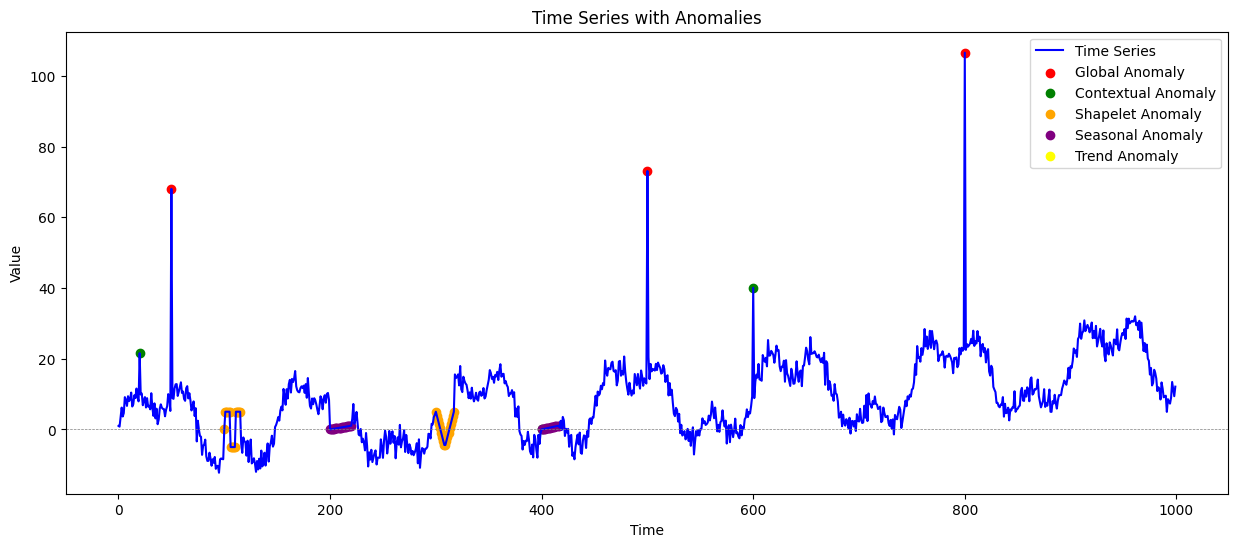

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 设置随机种子
np.random.seed(42)

anomaly_settings = {
    'global': {'sigma_range': (5, 10), 'n_anomalies': 1},
    'contextual': {'sigma_range': (3, 5), 'context_range': 10},
    'shapelet': {'length_range': (10, 30), 'amplitude': 5},
    'seasonal': {'length_range': (10, 50), 'amplitude': 10},
    'trend': {'length_range': (10, 20), 'amplitude': 10}
}

# 时间序列的长度
n_points = 1000

# 生成时间序列索引
time = np.arange(n_points)

# 生成趋势项 (线性趋势)
# trend = 0.01 * time
#生成缓慢变化的非线性趋势
trend = 0.01 * time + 0.0001 * time**1/2 + 0.00001 * time**2

# 生成周期项 (正弦波)
# seasonality = 10 * np.sin(2 * np.pi * time / 50)
#生成复杂的周期项
seasonality = 10 * np.sin(2 * np.pi * time / 150) + 5 * np.sin(2 * np.pi * time / 50)

# 生成随机噪声项
noise = np.random.normal(0, 2, n_points)

# 组合成复杂时间序列数据
series = trend + seasonality + noise

miu = np.mean(series)
sigma = np.std(series)

# 定义异常函数
def add_global_outlier(series, index):
    series[index] += np.random.uniform(*anomaly_settings['global']['sigma_range']) * sigma
def add_contextual_outliers(series, index):
    context_range = anomaly_settings['contextual']['context_range']
    local_miu = np.mean(series[index - context_range:index + context_range])
    local_sigma = np.std(series[index - context_range:index + context_range])
    series[index] += np.random.uniform(*anomaly_settings['contextual']['sigma_range']) * local_sigma

def create_shapelet():
    length = np.random.randint(*anomaly_settings['shapelet']['length_range'])
    shapelet_type = np.random.choice(['sine', 'triangle', 'square', 'sawtooth'])
    if shapelet_type == 'sine':
        return np.sin(np.linspace(0, 3 * np.pi, length)) * 5
    elif shapelet_type == 'triangle':
        return np.abs(np.mod(np.linspace(0, 4, length), 4) - 2) * 5 - 5
    elif shapelet_type == 'square':
        return np.sign(np.sin(np.linspace(0, 3 * np.pi, length))) * 5
    elif shapelet_type == 'sawtooth':
        return (np.mod(np.linspace(0, 2, length), 1) - 0.5) * 10
    
def create_seasonal_pattern():
    length = np.random.randint(*anomaly_settings['seasonal']['length_range'])
    return 10 * np.sin(np.linspace(0,2 * np.pi / 150,length)) + 5 * np.sin(np.linspace(0,2 * np.pi/ 50,length))
    
def add_shapelet_outlier(series, start, length, shapelet):
    series[start:start+length] = shapelet

def add_seasonal_outlier(series, start, length, season_pattern):
    series[start:start+length] = season_pattern

def add_trend_outlier(series, start, length, new_trend):
    trend_adjustment = np.linspace(0, new_trend, length)
    series[start:start+length] += trend_adjustment


# 添加异常
series_with_outliers = series.copy()
global_outliers = [50,500,800]
contextual_outliers = [20,400,600]
shapelet_outliers_strat = [100,300]
shapelet_outliers = []
seasonal_outliers_strat = [200,400]
seasonal_outliers = []
trend_outliers = []

for index in global_outliers:
    add_global_outlier(series_with_outliers, index)
for index in contextual_outliers:
    add_contextual_outliers(series_with_outliers, index)
for index in shapelet_outliers_strat:
    shapelet = create_shapelet()
    add_shapelet_outlier(series_with_outliers, index, len(shapelet), shapelet)
    #appedn whole shapelet
    shapelet_outliers+=range(index,index+len(shapelet))

for index in seasonal_outliers_strat:
    season_pattern = create_seasonal_pattern()
    add_seasonal_outlier(series_with_outliers, index, len(season_pattern), season_pattern)
    #appedn whole season pattern
    seasonal_outliers+=range(index,index+len(season_pattern))

    



# add_global_outlier(series_with_outliers, 500, 100)
# add_contextual_outliers(series_with_outliers, 10)

# # 创建形状异常和季节异常
# def create_shapelet(length):
#     return np.sin(np.linspace(0, 3 * np.pi, length)) * 5

# def create_seasonal_pattern(length):
#     return 10 * np.sin(np.linspace(0, 2 * np.pi, length))

# shapelet = create_shapelet(10)
# seasonal_pattern = create_seasonal_pattern(10)
# add_shapelet_outlier(series_with_outliers, 300, 10, shapelet)
# add_seasonal_outlier(series_with_outliers, 700, 10, seasonal_pattern)
# add_trend_outlier(series_with_outliers, 200, 10, 10)

# 绘制时间序列数据与异常
def plot_time_series_with_outliers(time, series, outliers):
    plt.figure(figsize=(15, 6))
    plt.plot(time, series, label='Time Series', color='blue')
    # plt.scatter(time[outliers], series[outliers], color='red', label='Anomaly')
    plt.scatter(time[global_outliers], series[global_outliers], color='red', label='Global Anomaly')
    plt.scatter(time[contextual_outliers], series[contextual_outliers], color='green', label='Contextual Anomaly')
    plt.scatter(time[shapelet_outliers], series[shapelet_outliers], color='orange', label='Shapelet Anomaly')
    plt.scatter(time[seasonal_outliers], series[seasonal_outliers], color='purple', label='Seasonal Anomaly')
    plt.scatter(time[trend_outliers], series[trend_outliers], color='yellow', label='Trend Anomaly')
    
    plt.title('Time Series with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.axhline(0, color='grey', linewidth=0.5, ls='--')
    plt.legend()
    plt.show()

plot_time_series_with_outliers(time, series_with_outliers, [500, 300, 700])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
dataroot = '/home/ysc/workspace/VisualTimeSeries/data/timeeval-datasets/multivariate/'
image_root = os.path.join(dataroot, 'img')
# good_pattern = ['CATSv2']
# dataroot = '/home/ysc/workspace/VisualTimeSeries/data/timeeval-datasets/multivariate/CalIt2/CalIt2-traffic.test.csv'
for file in os.listdir(dataroot):
# for file in good_pattern:
    if file == 'Daphnet':
        continue
    # image_file= os.path.join(image_root,file)
    datafile = os.path.join(dataroot,file)
    csv_files = glob.glob(os.path.join(datafile, '*.csv'))
    # image_files = glob.glob(os.path.join(datafile, '*.png'))
    # print(csv_files)
    for csv_file in csv_files:
        specifile = csv_file.split('/')[-1]
        specifile = (specifile.split('.')[0]+'.'+specifile.split('.')[1] if len(specifile.split('.'))>2 else specifile.split('.')[0])
        image_file = os.path.join(image_root, file, specifile)
        if not os.path.exists(image_file):
            os.makedirs(image_file)
        data = pd.read_csv(csv_file)
        columns = data.columns
        anomalies = data[columns[-1]].astype(int)
        events = np.where(anomalies == 1)[0]
        anomaly_rate = len(events) / len(anomalies)
        # print(anomalies)
        for column in columns[:-1]:
            if column == 'timestamp':
                continue
            vis_data = data[column]
            plt.figure(figsize=(24, 4))
            plt.plot(vis_data, label='Data', color='blue')
            for event in events:
                plt.axvspan(event - 0.1, event + 0.1, color='red', alpha=0.3, label='Anomaly' if event == events[0] else "")
            plt.title(f"Column: {column} with Anomalies rate: {anomaly_rate}")
            plt.legend()
            plt.savefig(os.path.join(image_file,column+'.png'))
            # plt.show()
            # plt.savefig(os.path.join(image_file,column+'.png'))
    
# data = pd.read_csv(dataroot)
# data.head()
# vis_data = data['in_count']+data['out_count']
# anomalies = data.iloc[-1] 
# events = np.where(anomalies == 1)[0]
# plt.figure(figsize=(24, 4))
# plt.plot(vis_data, label='Data', color='blue')  # 绘制序列

# # 使用背景高亮标出异常
# for event in events:
#     plt.axvspan(event - 0.1, event + 0.1, color='red', alpha=0.3, label='Anomaly' if event == events[0] else "")

# plt.title('Data with Anomalies')
# plt.xlabel('Time')
# plt.ylabel('Count')
# plt.legend()
# plt.show()
# plt.scatter(events, vis_data[events], color='red', label='Anomaly')
# plt.plot(vis_data)
# plt.show()
# plt.figure(figsize=(12,4))
# plt.plot(vis_data[0:1000])
# plt.show()

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: '/home/ysc/workspace/VisualTimeSeries/data/timeeval-datasets/multivariate/'